In [ ]:
import pandas as pd

In [62]:
dummy_data = {'Country': ['Ghana', 'Kenya', 'Nigeria', 'Togo'],
           'Capital': ['Accra', 'Nairobi', 'Abuja', 'Lome'],
           'Population': [10000, 8500, 35000, 12000],
           'Age': [60, 70, 80, 75]
}

data_to_concat = pd.DataFrame(dummy_data, index=[2, 4, 6, 8])
    
print (data_to_concat)

   Country  Capital  Population  Age
2    Ghana    Accra       10000   60
4    Kenya  Nairobi        8500   70
6  Nigeria    Abuja       35000   80
8     Togo     Lome       12000   75


In [52]:
df = pd.read_csv('fuel1.csv')

# df.describe(include='all')

df.isnull().sum()

df.groupby('fuel_unit')['fuel_unit'].count()

df[['fuel_unit']] = df[['fuel_unit']].fillna(value='mcf')


In [ ]:
df.groupby('report_year')['report_year'].count()

df.groupby('fuel_type_code_pudl').first()

fdata1 = df.iloc[0:19000].reset_index(drop=True)
fdata2 = df.iloc[19000:].reset_index(drop=True)

assert len(df) == (len(fdata1) + len(fdata2))

In [66]:
pd.merge(fdata1, fdata2, how="inner")
pd.merge(fdata1, fdata2, how="outer")

pd.merge(fdata1, fdata2, how="left")

In [67]:
pd.concat([df, data_to_concat]).reset_index(drop=True)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,Country,Capital,Population,Age
0,f1_fuel_1994_12_1_0_7,1.0,1994.0,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,NaN,NaN,NaN,NaN
1,f1_fuel_1994_12_1_0_10,1.0,1994.0,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,NaN,NaN,NaN,NaN
2,f1_fuel_1994_12_2_0_1,2.0,1994.0,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,NaN,NaN,NaN,NaN
3,f1_fuel_1994_12_2_0_7,2.0,1994.0,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,NaN,NaN,NaN,NaN
4,f1_fuel_1994_12_2_0_10,2.0,1994.0,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29522,f1_fuel_2018_12_12_1_14,12.0,2018.0,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.680,NaN,NaN,NaN,NaN
29523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ghana,Accra,10000.0,60.0
29524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kenya,Nairobi,8500.0,70.0
29525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nigeria,Abuja,35000.0,80.0


In [68]:
df.duplicated().any()

False

Text(0.5, 0, 'Fuel Unit')

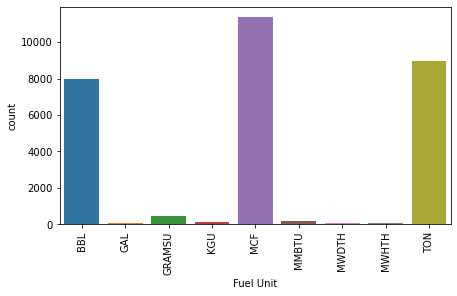

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
            'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')



Text(0.5, 0, 'Fuel Unit')

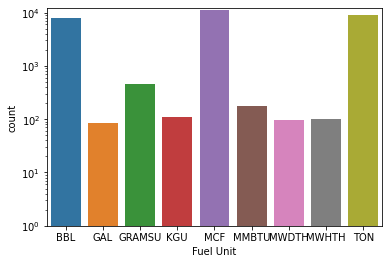

In [75]:
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

<AxesSubplot:xlabel='utility_id_ferc1', ylabel='fuel_cost_per_mmbtu'>

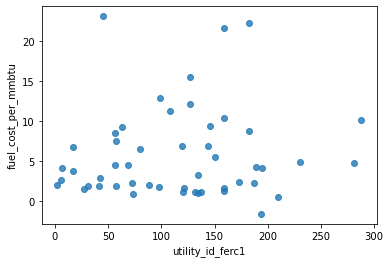

In [76]:
sample_df = df.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='utility_id_ferc1'>

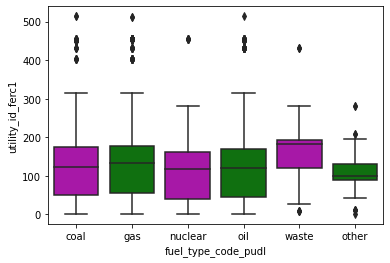

In [78]:
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=df)

<AxesSubplot:xlabel='fuel_cost_per_unit_burned', ylabel='Density'>

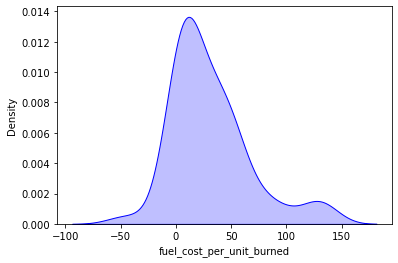

In [79]:
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")